In [1]:
#519 -0.5 1
#493 -0.9 1.5
#1826 0 0
#5013 0.9 1
#1741 8 2
#205 -8 0
#1408 -8 3
#5683 -9 0
#5745 0 10
#2029 0 3

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
import tt

NVelMax = 85184
NValMax2 = 32*32*32

a = np.loadtxt("vel_mesh.ini", skiprows=1)
a = a[:, 0:3]

b = np.loadtxt("func_cell=5745.txt")
b = b.ravel()
b.shape = (NVelMax, 1)

a = np.hstack((a, b))


#a = a[a[:,2] == 0.5]

#a = a[:, [0,1,3]]


a = a[a[:,0].argsort()]
a = a[a[:,1].argsort(kind='mergesort')]
a = a[a[:,2].argsort(kind='mergesort')]

f = a[:, 3]
f.shape = (44, 44, 44)

f = f[6:-6, 6:-6, 6:-6]


d = 5
# x = np.linspace(0, 1., 2 ** d)

# F = lambda x, y: np.exp(-10*(x-0.5)**2 - 10*(y-0.4)**2) + x
# X, Y = np.meshgrid(x,x)
# f = F(X, Y)


b = [2 for i in range(d)]
b = tuple(b)
q = b + b + b

f1 = np.reshape(f.ravel(), q)

f2 = np.zeros(q)

for k in range(2**d):
    for i in range(2**d):
        for j in range(2**d):
            J = np.unravel_index(i, b)
            K = np.unravel_index(j, b)
            L = np.unravel_index(k, b)
            f2[J + K + L] = f[i, j, k]

print f.shape, f1.shape
#f = a[:, 2]
#f.shape = (44, 44)

(32, 32, 32) (2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2)


||f|| =  0.028921295888123307


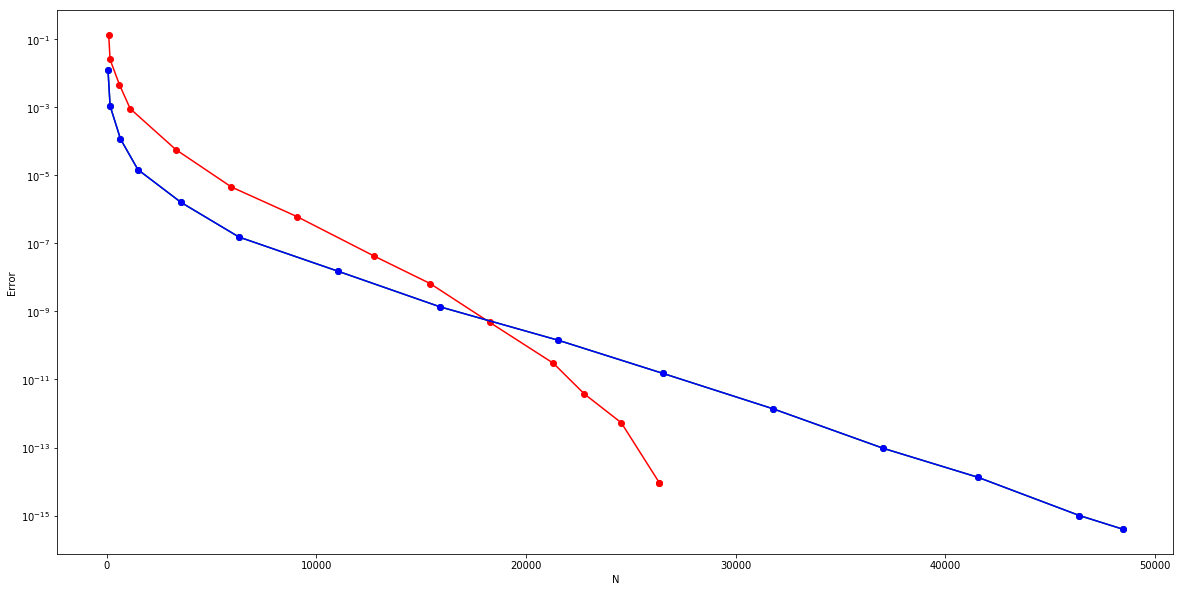

In [2]:
f_tt = tt.tensor(f)
f1_tt = tt.tensor(f1)
f2_tt = tt.tensor(f2)

n = 15
t = (np.array((0.1))) ** (np.arange(n))
s = np.zeros(n)
l = np.zeros(n)
s1 = np.zeros(n)
l1 = np.zeros(n)
s2 = np.zeros(n)
l2 = np.zeros(n)

for i in range(n):
    s[i] = np.linalg.norm((f - f_tt.round(t[i]).full())/np.linalg.norm(f))
    l[i] = f_tt.round(t[i]).core.size
    s1[i] = np.linalg.norm(f1 - f1_tt.round(t[i]).full())
    l1[i] = f1_tt.round(t[i]).core.size
    s2[i] = np.linalg.norm(f2 - f2_tt.round(t[i]).full())
    l2[i] = f2_tt.round(t[i]).core.size
    
fig, ax1 = plt.subplots(1, figsize = (20,10))

ax1.semilogy(l, s, '-ro')
ax1.semilogy(l1, s1, '-go')
ax1.semilogy(l2, s2, '-bo')
ax1.set_xlabel('N')
ax1.set_ylabel('Error')

print '||f|| = ', np.linalg.norm(f)
#fig, ax = plt.subplots()

#im = ax.imshow(f, interpolation='bilinear',
#               origin='lower', extent=[-21.5, 22.5, -21.5, 22.5],
#               vmax=abs(f).max(), vmin=-abs(f).max())

#fig.savefig("flow.png")

plt.show()